## Week 2: Gambler's Ruin Problem and Mean Time Spent in Transient States 

* Simulating and analyzing the MC associated with the Gambler's Ruin Problem
* Studying the Mean TIme in Transient States (for Practice Problem)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### The Gambler's Ruin Problem

By modifying the 1D Random Walk (cf. week 1), we can simulate a trajectory of the Markov Chain associated with the Gambler's Ruin Problem

Initialization

In [49]:
x = []
# starting with $25
x.append(25)
# amount of money of the bank
N = 50

Simulation

In [50]:
# probability of winning a bet:
p = 0.45

while 0 < x[-1] < N:
    if np.random.rand() <= p:
        # winning $1 bet
        x.append(x[-1] + 1) 
    else:
        # losing $1 bet
        x.append(x[-1] - 1) 

Plotting the outcome of the simulation

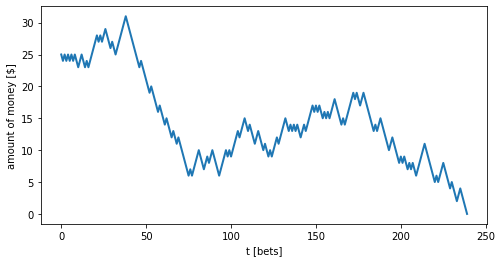

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_xlabel("t [bets]")
ax.set_ylabel("amount of money [$]")
ax.plot(x, lw=2)

By simulating the process many times, let's see what's the probability of ruin. We'll see in class how we can find this analyically.

In [52]:
# modify any of these parameters to see what happens
nrealizations = 1000
p = 0.45      # P(winning a bet)
N = 50      # money of bank
x0 = 40      # initial state

realizations = []

for r in range(nrealizations):
    x = [x0]
    while 0 < x[-1] < N:
        if np.random.rand() <= p: # (note that Lebesgue_measure(np.random.rand() = p) = 0)
            # winning $1 bet
            x.append(x[-1] + 1) 
        else:
            # losing $1 bet
            x.append(x[-1] - 1)
    realizations.append(x)

# count the times of ruin
nruins = 0
for x in realizations:
    if x[-1] == 0:
        nruins += 1
        
print("Probability of ruin is approximately", nruins / nrealizations)

Probability of ruin is approximately 0.869


We now study the transient states (cf. lecture) {1, ..., N-1} and the probability of revisiting a state. For a state i, the following block allows to extract, from running M simulations over n steps with initial state i, what is the fraction of trajectories such that i was revisited. We set n large (1000), so the results of the simulations approximate the probability of return.

In [63]:
# modify any of these parameters again to see what happens
M = 1000      # number of simulations
n = 100       # number of steps
p = 0.49      # P(winning a bet)
N = 50      # money of bank
i = 25       # initial state

revisited = np.zeros(M)
for r in range(M):
    x = [i]
    step = 1
    while 0 < x[-1] < N and step <= n and revisited[r] != 1:
        if np.random.rand() <= p: 
            # winning $1 bet
            x.append(x[-1] + 1) 
        else:
            # losing $1 bet
            x.append(x[-1] - 1)
        if x[-1] == i:
            revisited[r] = 1
        step += 1
            
print("Probability of revisiting until nth step is approximately", np.sum(revisited) / M)

Probability of revisiting until nth step is approximately 0.915


Let's also study the average number of times that a trajectory visited state i. The following block allows to extract this value

In [64]:
# modify any of these parameters again to see what happens
M = 1000      # number of simulations
n = 1000       # number of steps
p = 0.49      # P(winning a bet)
N = 50      # money of bank
i = 25      # initial state

visited = np.ones(M)
for r in range(M):
    x = [i]
    step = 1
    while 0 < x[-1] < N and step <= n:
        if np.random.rand() <= p:
            # winning $1 bet
            x.append(x[-1] + 1) 
        else:
            # losing $1 bet
            x.append(x[-1] - 1)
        if x[-1] == i:
            visited[r] += 1
        step += 1

print("Mean number of visiting i =", i, "is", np.sum(visited) / M)

Mean number of visiting i = 25 is 21.724


By experimenting with this multiple times, let's compare the results for different possible values of p

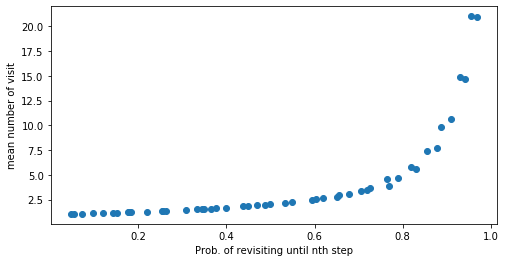

In [65]:
# Varying p
p_array = np.linspace(0.02, 0.98, num=50)

M = 1000      # number of simulations
n = 1000       # number of steps
N = 50      # money of bank
i = 25       # initial state

prob_revis = np.zeros(len(p_array))
mean_nvisit = np.zeros(len(p_array))
for idx, p in enumerate(p_array):
    visited = np.ones(M)
    for r in range(M):
        x = [i]
        step = 1
        while 0 < x[-1] < N and step <= n:
            if np.random.rand() <= p:
                # winning $1 bet
                x.append(x[-1] + 1) 
            else:
                # losing $1 bet
                x.append(x[-1] - 1)
            if x[-1] == i:
                visited[r] += 1
            step += 1
    prob_revis[idx] = len(np.where(visited > 1)[0]) / M
    mean_nvisit[idx] = np.sum(visited) / M

fig1, ax1 = plt.subplots(1, 1, figsize=(8, 4))
ax1.set_xlabel("Prob. of revisiting until nth step")
ax1.set_ylabel("mean number of visit")
ax1.plot(prob_revis, mean_nvisit, lw=0, marker="o")


These simulations suggest these two quantities are related. We'll prove and generalize this more precisely in class!

### Mean Time in Transient States

We consider here a finite state Markov Chain with a set of transient states numbered as $T= \left\{ 1, 2, \ldots, t \right\} $.

Let us define the transition matrix of transient states $\mathbf{P}_T$, such that $(\mathbf{P}_T)_{ij} = p_{ij} = P(X_1 =j \ | \ X_0=i)$ ($\mathbf{P}_T$ is a sub-matrix of the original full transition matrix of the Markov Chain). 

We also introduce the matrix $\mathbf{S}$ of size $t$, such that $(\mathbf{S})_{ij} = s_{ij}$ is the expected number of times where the Markov Chain is in state $j$, given it starts in state $i$. By conditioning on the initial transition (similarly as what we did when studying the probability of ruin in the Gambler's ruin problem), one can show that 

\begin{equation}
s_{ij} = \delta_{ij} + \sum_{k=1}^t p_{ik} s_{kj},
\end{equation}
which in matrix notation can be written as
\begin{equation}
\mathbf{S} = \mathbf{I} + \mathbf{P}_T \mathbf{S},
\end{equation} 
so 
\begin{equation}
\mathbf{S} = (\mathbf{I} - \mathbf{P}_T)^{-1}
\end{equation}

For a given matrix $\mathbf{P}_T$, the following block computes $\mathbf{S}$ (you can use it to solve practice problems, or find the probability of return $f_i$ associated with transient states (cf. properties of transience seen in class and section 4.6 in Ross textbook)).

In [ ]:
# specify your PT
# PT = ...

S = numpy.linalg.inv(np.identity(PT.shape[0]) - PT)